In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [55]:
rng = np.random.default_rng(42)

In [56]:
sample_list = []
p =0.55
for i in range(15):
    size = int(np.floor(10**(i/5))+2)   
    samples = rng.binomial(n=1, p=p, size=size)
    sample_list.append(samples)

for idx, arr in enumerate(sample_list):
    print(f"Iteration {idx}: {arr.shape}")

Iteration 0: (3,)
Iteration 1: (3,)
Iteration 2: (4,)
Iteration 3: (5,)
Iteration 4: (8,)
Iteration 5: (12,)
Iteration 6: (17,)
Iteration 7: (27,)
Iteration 8: (41,)
Iteration 9: (65,)
Iteration 10: (102,)
Iteration 11: (160,)
Iteration 12: (253,)
Iteration 13: (400,)
Iteration 14: (632,)


### Z-test 

In [57]:
mean_estimator = lambda x: np.mean(x)
Z_stat = lambda x, h0_mu: (mean_estimator(x) - h0_mu) / (np.std(x, ddof=1) / np.sqrt(len(x)))

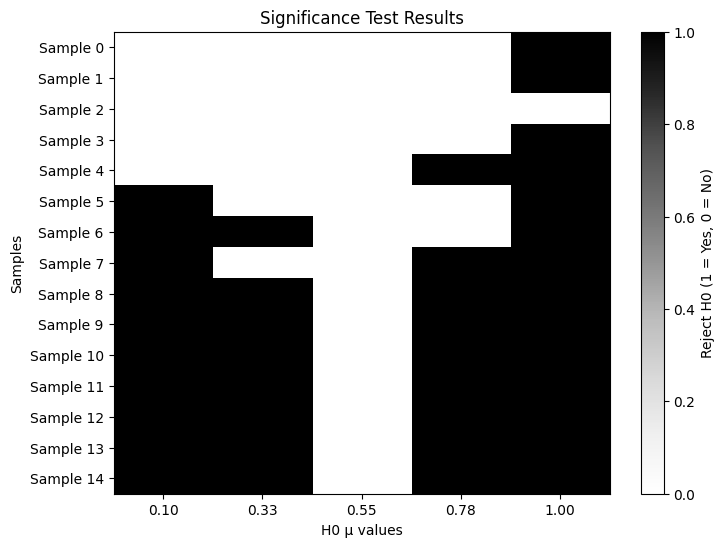

In [58]:
h0_values = np.linspace(0.1, 1, 5)
alpha = 1.96

significance = np.zeros((len(sample_list), len(h0_values)), dtype=int)

for j, h0_mu in enumerate(h0_values):
    for i, sample in enumerate(sample_list):
        Z = Z_stat(sample, h0_mu)
        significance[i, j] = int(abs(Z) > alpha)

plt.figure(figsize=(8, 6))
plt.imshow(significance, cmap="Greys", aspect="auto")
plt.colorbar(label="Reject H0 (1 = Yes, 0 = No)")
plt.xticks(range(len(h0_values)), [f"{val:.2f}" for val in h0_values])
plt.yticks(range(len(sample_list)), [f"Sample {i}" for i in range(len(sample_list))])
plt.xlabel("H0 μ values")
plt.ylabel("Samples")
plt.title("Significance Test Results")
plt.show()

